# SQL Bootcamp Material

### Import modules and SQLite Database

In [2]:
import pandas as pd
from pprint import pprint, pformat

import sqlite3
conn=sqlite3.connect('university.db')


### Database and table metadata

*    https://www.sqlite.org/schematab.html
*    https://www.sqlite.org/pragma.html

In [14]:
def gettablescema() -> str:
  return """
    SELECT *
    FROM sqlite_master
    WHERE type='table'
  """
pd.read_sql(gettablescema(),conn)


,type,name,tbl_name,rootpage,sql
0,table,student_main,student_main,2,CREATE TABLE student_main (\n\tstudent_id VARC...
1,table,major_crosswalk,major_crosswalk,4,CREATE TABLE major_crosswalk (\n\tid INTEGER N...
2,table,scholarship_crosswalk,scholarship_crosswalk,5,CREATE TABLE scholarship_crosswalk (\n\tid INT...
3,table,student_key,student_key,6,CREATE TABLE student_key (\n\tstudent_id VARCH...
4,table,student_enrollment,student_enrollment,8,CREATE TABLE student_enrollment (\n\tid INTEGE...
5,table,graduation,graduation,9,CREATE TABLE graduation (\n\tid INTEGER NOT NU...
6,table,scholarship_rules,scholarship_rules,10,CREATE TABLE scholarship_rules (\n\tid INTEGER...
7,table,student_scholarship,student_scholarship,11,CREATE TABLE student_scholarship (\n\tid INTEG...


In [15]:
def tablemetadata(tablename: str) -> str:
  return f"""
    PRAGMA table_info('{tablename}')
  """

for tablename in ['student_main','student_scholarship']:
  print(f'tablename: {tablename}')
  display(pd.read_sql(tablemetadata(tablename),conn))
  print('=================')

tablename: student_main


,cid,name,type,notnull,dflt_value,pk
0,0,student_id,VARCHAR(9),1,None,1
1,1,last_name,VARCHAR,1,None,0
2,2,first_name,VARCHAR,1,None,0
3,3,middle_initial,VARCHAR(1),0,None,0
4,4,email,VARCHAR,0,None,0
5,5,gender,VARCHAR(1),1,None,0
6,6,ethnicity,VARCHAR,1,None,0
7,7,address,VARCHAR,1,None,0
8,8,us_citizen,VARCHAR(1),1,None,0
9,9,us_resident,VARCHAR(1),1,None,0


tablename: student_scholarship


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,finance_id,VARCHAR(12),0,None,0
2,2,scholarship_term,VARCHAR(6),0,None,0
3,3,scholarship_code,VARCHAR,0,None,0
4,4,scholarship_total,INTEGER,0,None,0
5,5,scholarship_payment,INTEGER,0,None,0
6,6,scholarship_refund,INTEGER,0,None,0


In [16]:
def querytables(tablename: str,limit:int=10) -> str:
  return f"""
    SELECT *
    FROM {tablename}
    LIMIT {limit}
  """

for tablename in ['student_main','student_scholarship']:
  print(f'tablename: {tablename}')
  display(pd.read_sql(querytables(tablename),conn))
  print('=================')

tablename: student_main


,student_id,last_name,first_name,middle_initial,email,gender,ethnicity,address,us_citizen,us_resident,state_resident,pell_recipient,us_veteran
0,785657448,Nolan,Amy,None,kcooper@example.net,F,B,"0562 Michelle Drives Suite 738, Spearsbury, HI...",Y,Y,Y,Y,N
1,191366001,Figueroa,Carlos,None,hudsoncourtney@example.com,F,B,"2609 Bethany Village Suite 834, East Nicholasf...",Y,Y,N,N,Y
2,407722073,Yates,Cody,None,victormurphy@example.org,M,A,"5890 Pena Squares Suite 369, Johnsland, AL 03146",Y,N,N,N,N
3,584919956,Williams,Heather,W,None,M,P,"145 Dorsey Harbor Suite 659, Marychester, AR 5...",Y,Y,Y,N,N
4,405120714,Robinson,Sherry,M,emily05@example.net,M,W,"89174 Kristin Meadow Suite 722, East Dawnfurt,...",N,Y,Y,Y,N
5,436547538,Brown,Jessica,None,nancy94@example.org,F,W,"5810 Ashley Canyon Apt. 049, Port Kyle, RI 94809",Y,Y,Y,N,N
6,278234390,Mccarthy,Jason,None,tuckerdeanna@example.com,M,N,"0765 Rachael Oval Suite 104, Jessicaberg, NE 2...",Y,Y,Y,N,N
7,274656787,Li,Vincent,Q,None,F,P,"7326 Haynes Corners Suite 724, Danieltown, MA ...",Y,Y,Y,N,N
8,407347424,Murphy,Kenneth,None,johnrush@example.org,M,A,"624 Jeremiah Union, Lake Kimberly, DE 21754",Y,Y,N,N,N
9,894477940,Brady,Shane,None,kenneth60@example.net,M,B,"368 Joseph Harbor, Sarahport, LA 24669",Y,N,Y,N,N


tablename: student_scholarship


,id,finance_id,scholarship_term,scholarship_code,scholarship_total,scholarship_payment,scholarship_refund
0,1,677708223363,201801,PRE,1500,0,1500
1,2,677708223363,202101,PRE,1500,1500,0
2,3,677708223363,202108,PRE,1500,954,546
3,4,677708223363,202101,PRE,1500,0,1500
4,5,677708223363,202105,PRE,1500,1500,0
5,6,677708223363,202108,PRE,1500,1500,0
6,7,677708223363,202101,PRE,1500,1500,0
7,8,677708223363,202308,PRE,1500,804,696
8,9,677708223363,202301,PRE,1500,1500,0
9,10,677708223363,202405,PRE,1500,0,1500


<u>**Order of Operations**</u>

The SQL query engine executes a query differently than we write it. We write it more like a sentence / how we'd describe what we want

**Select** _columns_ <br>
**From** _table_ <br>
**Where** _condition_ <br>
**Group by**  _column(s)_ <br>
**Having** _condition_<br>
**Order by**  _column(s)_<br>
**Limit** _condition(s)_

The SQL query engine on the other hand builds it from the inside out. It starts with <b>FROM</b> table(s) and <b>JOIN</b>(s) which assembles the dataset. Then it filters out rows as requested in the <b>WHERE</b> clause, puts them in buckets according to the <b>GROUP BY</b> clause, filters the groups according to the <b>HAVING</b> clause, picks the fields in the <b>SELECT</b> statement, gets them all in order with the <b>ORDER BY</b> clause, and then applies any <b>LIMIT</b>s to the number of rows returned.

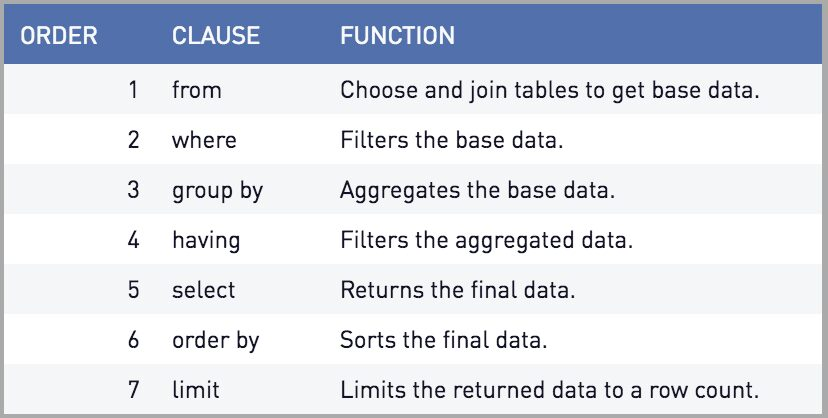<br>https://www.sisense.com/blog/sql-query-order-of-operations/

<u>_Side note_ <br></u>
In most SQL languages, this order of operations is why you can't reference an alias in the where clause that you wrote in the select statement because to the query engine, it hasn't gotten to the select statement yet to know you renamed a column. <br><br>
SQLite allows the use of aliases not following the order of operations in a way that other SQL languages do not.<br><br>
Also, SQLite does not care about white space in any way, unlike Python. It is completely up to you on what format is easiest to you.

<u>**Window functions**</u><br>
SQLite window functions are based on what PostgreSQL offers. Other SQL languages have additional functions and / or can be implemented slightly differently.
<br><br>Overall, they can be grouped into these domains:<br><br>
**Ranking Functions:** ROW_NUMBER(), RANK(), DENSE_RANK(), NTILE()

**Aggregate Functions:** SUM(), AVG(), MIN(), MAX(), COUNT()

**Value Functions:** LEAD(), LAG(), FIRST_VALUE(), LAST_VALUE(), NTH_VALUE()

**Windowing Functions:** ROWS BETWEEN, RANGE BETWEEN

**Statistical Functions:** PERCENT_RANK(), CUME_DIST()

*    https://www.sqlite.org/windowfunctions.html

SQL works in set based approach. You group / aggregate over all of the data in a table, or set. Sometimes you need SQL to manipulate the data into smaller sets than the entire query results. Window functions allow you to achieve that by creating _windows_ of data by defining partitions to break up the query results in one step, rather than using an iterative approach and reading the query results row by agonizing row, which is usually terribly inefficient. 

Suppose we wanted to return the top 5 scholarships by term.

If we didn't have windows functions, we would have to self join using sub queries and that would not be efficient in a computational aspect because it would have to scan each row individually and compare it to the other rows.

In [3]:
#self join example
def SelfJoinSubQueries() -> str:
  return f"""
SELECT sc1.scholarship_term, sc1.scholarship_code, sc1.scholarship_count
FROM (
    SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    GROUP BY ss.scholarship_term, ss.scholarship_code
) sc1
WHERE (
    SELECT COUNT(*) 
    FROM (
        SELECT
            ss.scholarship_code,
            COUNT(*) AS scholarship_count
        FROM student_main sm
        JOIN student_key sk ON sm.student_id = sk.student_id
        JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
        WHERE ss.scholarship_term = sc1.scholarship_term
        GROUP BY ss.scholarship_code
    ) sc2
    WHERE sc2.scholarship_count > sc1.scholarship_count
) < 5
order by scholarship_term, scholarship_count desc;
"""
display(pd.read_sql(SelfJoinSubQueries(),conn))

,scholarship_term,scholarship_code,scholarship_count
0,201501,USE,21
1,201501,PRE,19
2,201501,FGA,11
3,201501,GVS,8
4,201501,ALE,2
...,...,...,...
169,202408,PRE,43
170,202408,GVS,18
171,202408,USE,5
172,202408,BCI,2


If we use a window function, it allows SQLite to run one query, and then displays the results for us in the way we requested.

Our query counts the number of scholarships each term and then shows the top five most popular ones.

We can achieve that by using the **RANK()** window function. It adds a rank, or something analogous to a dataframe index, that we can now reference in the query for filtering. In the case of ties, **RANK()** skips the next number (or numbers if there are multiple ties) and continues with numbering.

The **OVER** keyword is where we define our _window_ for the data. If the **OVER()** parameter is left blank, it assumes the window is the entire dataset. In this case we're wanting to break down the data by scholarship_term, so we have **OVER(PARITION BY scholarship_term ORDER BY Count(*) DESC)** so we sort our count from most to least.

In [71]:
def windowfunctionexample() -> str:
  return f"""
    SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count,
        RANK() OVER (PARTITION BY ss.scholarship_term ORDER BY COUNT(*) DESC) AS rnk
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    GROUP BY ss.scholarship_term, ss.scholarship_code
  """
display(pd.read_sql(windowfunctionexample(),conn))

,scholarship_term,scholarship_code,scholarship_count,rnk
0,201501,USE,21,1
1,201501,PRE,19,2
2,201501,FGA,11,3
3,201501,GVS,8,4
4,201501,GAM,2,5
...,...,...,...,...
185,202408,GVS,18,2
186,202408,USE,5,3
187,202408,GAM,2,4
188,202408,BCI,2,4


We then encapsulate that entire query as a derived table, and filter the top five through the where clause on the outside. 

In [72]:
def windowfunctionexample() -> str:
  return f"""
SELECT *
FROM (
    SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count,
        RANK() OVER (PARTITION BY ss.scholarship_term ORDER BY COUNT(*) DESC) AS Rank
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    GROUP BY ss.scholarship_term, ss.scholarship_code
) ranked
WHERE ranked.Rank <= 5;
  """
display(pd.read_sql(windowfunctionexample(),conn))

,scholarship_term,scholarship_code,scholarship_count,Rank
0,201501,USE,21,1
1,201501,PRE,19,2
2,201501,FGA,11,3
3,201501,GVS,8,4
4,201501,GAM,2,5
...,...,...,...,...
162,202408,PRE,43,1
163,202408,GVS,18,2
164,202408,USE,5,3
165,202408,GAM,2,4


DenseRank on the other hand, does not skip any numbers.

In [ ]:
#Rank where it shows that two is skipped
def Rank() -> str:
  return f"""
    SELECT
        ss.Scholarship_term,
        ss.Scholarship_code,
        COUNT(*) AS Scholarship_count,
        RANK() OVER (PARTITION BY ss.scholarship_term ORDER BY COUNT(*) DESC) AS Rank
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    where scholarship_term = '201605'
    GROUP BY ss.scholarship_term, ss.scholarship_code
  """
display(pd.read_sql(Rank(),conn))

,scholarship_term,scholarship_code,Scholarship_count,Rank
0,201605,USE,23,1
1,201605,PRE,23,1
2,201605,GVS,12,3
3,201605,FGA,4,4
4,201605,GAM,1,5


In [ ]:
#Dense Rank where two is not skipped
def DenseRank() -> str:
  return f"""
    SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count,
        DENSE_RANK() OVER (PARTITION BY ss.scholarship_term ORDER BY COUNT(*) DESC) AS DenseRank
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    WHERE scholarship_term = '201605'
    GROUP BY ss.scholarship_term, ss.scholarship_code
  """
display(pd.read_sql(DenseRank(),conn))

,scholarship_term,scholarship_code,scholarship_count,DenseRank
0,201605,USE,23,1
1,201605,PRE,23,1
2,201605,GVS,12,2
3,201605,FGA,4,3
4,201605,GAM,1,4


Something similar to the rank / dense rank is the <b>ROW_NUMBER()</b> window function. It too adds an incremented column, but in the case of <b>ROW_NUMBER()</b> it just adds a sequential row number based on the position of the record in the dataset rather than a ranking tied to a specific value.

You could use <b>ROW_NUMBER()</b> to achieve the previous query and filter by that instead of the ranking. The downside to using row number is if there are ties, and you ask for the top 3 things, but there's four rows with the top 3 numbers, you will lose the 4th row.

In [36]:
#RowNumber
def RowNumber() -> str:
  return f"""
SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count,
        ROW_NUMBER() OVER (
            PARTITION BY ss.scholarship_term 
            ORDER BY COUNT(*) DESC
        ) AS RowNum
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    WHERE scholarship_term = '201605'
    GROUP BY ss.scholarship_term, ss.scholarship_code
  """
display(pd.read_sql(RowNumber(),conn))

,scholarship_term,scholarship_code,scholarship_count,RowNum
0,201605,USE,23,1
1,201605,PRE,23,2
2,201605,GVS,12,3
3,201605,FGA,4,4
4,201605,GAM,1,5


In [ ]:
#Row Number to give the top three rows, but only the top TWO values
def RowNumber() -> str:
  return f"""
SELECT *
FROM (
SELECT
        ss.scholarship_term,
        ss.scholarship_code,
        COUNT(*) AS scholarship_count,
        ROW_NUMBER() OVER (
            PARTITION BY ss.scholarship_term 
            ORDER BY COUNT(*) DESC
        ) AS RowNum
    FROM student_main sm
    JOIN student_key sk ON sm.student_id = sk.student_id
    JOIN student_scholarship ss ON sk.finance_id = ss.finance_id
    JOIN scholarship_crosswalk sc ON sc.scholarship_code = ss.scholarship_code
    WHERE scholarship_term = '201605'
    GROUP BY ss.scholarship_term, ss.scholarship_code
) ranked
WHERE RowNum <= 3;
  """
display(pd.read_sql(RowNumber(),conn))

,scholarship_term,scholarship_code,scholarship_count,RowNum
0,201605,USE,23,1
1,201605,PRE,23,2
2,201605,GVS,12,3


**ADDITIONAL READING**<br>
_This book is focused specifically on Microsoft SQL / T-SQL, but the book goes into great detail about the history and philosophy behind SQL itself and window functions. The syntax between T-SQL and SQLite is almost identical in this case._ <br>
T-SQL Window Functions: For data analysis and beyond, 2nd Edition <br>
https://learning.oreilly.com/library/view/t-sql-window-functions/9780135861554/
<br><br>
_His book_ T-SQL Fundamentals, 4th Edition _also goes into great detail about all things SQL._ <br>
https://learning.oreilly.com/library/view/t-sql-fundamentals-4th/9780138101930/ <br><br>

DataLemur is also an excellent resource for learning PostgreSQL, which is what SQLite is modeled on.<br>
https://datalemur.com/sql-tutorial/sql-aggregate-window-functions <br>
https://datalemur.com/sql-tutorial/query-order-of-execution
